# Exploratory Data Analysis & Feature Engineering

### Building Electricity Usage & Building Age

This notebook uses the cleaned and merged dataset from Notebook 1 to:
- Perform deeper exploratory data analysis (EDA)
- Visualize how electricity use varies by building age, size, and type
- Engineer new features such as energy intensity (kWh per square foot)
- Fit improved regression models using multiple predictors
- Compare model performance to the baseline model from Notebook 1


### Load processed data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

# Load full cleaned merged dataset
merged_df = pd.read_csv("../data/processed/buildings_electricity_cleaned.csv", low_memory=False)

merged_df['building_age'] = 2025 - merged_df['yearbuilt_filled']

building_level = (
    merged_df
    .groupby('building_id', as_index=False)
    .agg({
        'electricity': 'mean',
        'building_age': 'first',
        'sqft': 'first',
        'primarspaceusage': 'first'
    })
    .rename(columns={'electricity': 'mean_electricity'})
)

building_level.head()




### Sanity checks

In [5]:
merged_df.head()
merged_df.info()
merged_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12033083 entries, 0 to 12033082
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              object 
 1   building_id            object 
 2   electricity            float64
 3   site_id                object 
 4   building_id_kaggle     float64
 5   site_id_kaggle         float64
 6   primaryspaceusage      object 
 7   sub_primaryspaceusage  object 
 8   sqm                    float64
 9   sqft                   float64
 10  lat                    float64
 11  lng                    float64
 12  timezone               object 
 13  hotwater               object 
 14  chilledwater           object 
 15  steam                  object 
 16  water                  object 
 17  irrigation             object 
 18  solar                  float64
 19  gas                    object 
 20  industry               object 
 21  subindustry            object 
 22  heatingtype     

,timestamp,building_id,electricity,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,...,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating,yearbuilt_filled,building_age
count,12033083,12033083,1.203308e+07,12033083,1.089201e+07,1.189036e+07,12033083,12033083,1.203308e+07,1.203308e+07,...,4.915052e+06,1.852865e+06,0.0,1477152.0,0.0,0.0,184138,2726146,1.203308e+07,1.203308e+07
unique,17544,755,NaN,10,NaN,NaN,15,63,NaN,NaN,...,NaN,NaN,NaN,98.0,NaN,NaN,2,7,NaN,NaN
top,2016-09-02 09:00:00,Robin_education_Megan,NaN,Lamb,NaN,NaN,Education,Office,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,Gold,D,NaN,NaN
freq,738,17544,NaN,2360098,NaN,NaN,5976755,1485458,NaN,NaN,...,NaN,NaN,NaN,42481.0,NaN,NaN,155826,795532,NaN,NaN
mean,NaN,NaN,1.404883e+02,NaN,5.406933e+02,4.623085e+00,NaN,NaN,8.622064e+03,9.280716e+04,...,4.345812e+00,4.672758e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.966554e+03,5.744559e+01
std,NaN,NaN,2.411778e+02,NaN,4.213617e+02,4.475443e+00,NaN,NaN,1.053036e+04,1.133479e+05,...,3.409918e+00,4.936008e+02,NaN,NaN,NaN,NaN,NaN,NaN,3.085805e+01,3.085805e+01
min,NaN,NaN,1.000000e-04,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.630000e+01,2.830000e+02,...,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.900000e+03,7.000000e+00
25%,NaN,NaN,1.506000e+01,NaN,2.020000e+02,2.000000e+00,NaN,NaN,2.187800e+03,2.354900e+04,...,2.000000e+00,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.945000e+03,3.300000e+01
50%,NaN,NaN,5.782500e+01,NaN,4.820000e+02,3.000000e+00,NaN,NaN,5.295000e+03,5.699500e+04,...,3.000000e+00,3.040000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.969000e+03,5.500000e+01
75%,NaN,NaN,1.544298e+02,NaN,6.930000e+02,5.000000e+00,NaN,NaN,1.071060e+04,1.152880e+05,...,6.000000e+00,5.170000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.991000e+03,7.900000e+01


**From here we can see that the new processed dataset has the expected columns,types, and row counts before performing deeper analysis**

### Building level analysis

**Basic distributions:**

i. Histogram of **building age**

ii. Histogram of **mean electricity** 

iii. Histogram of **square footage**

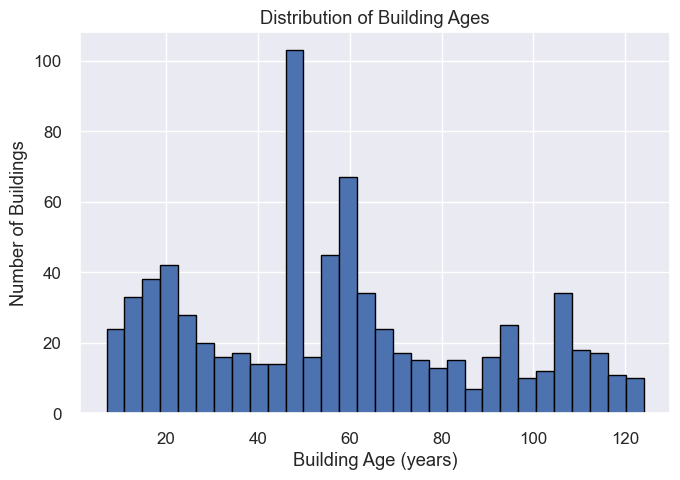

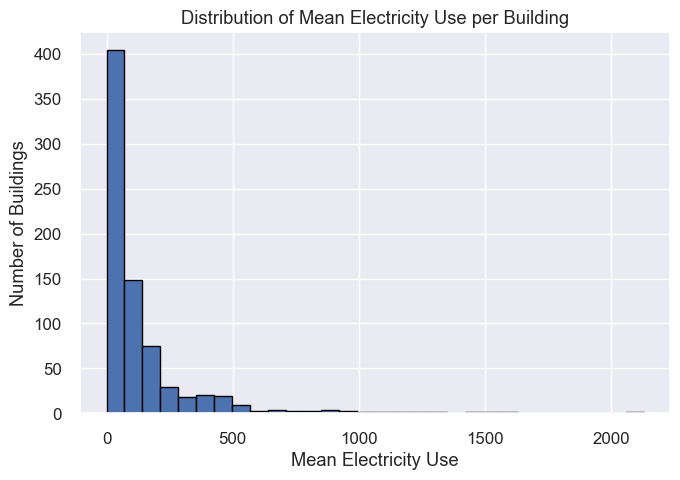

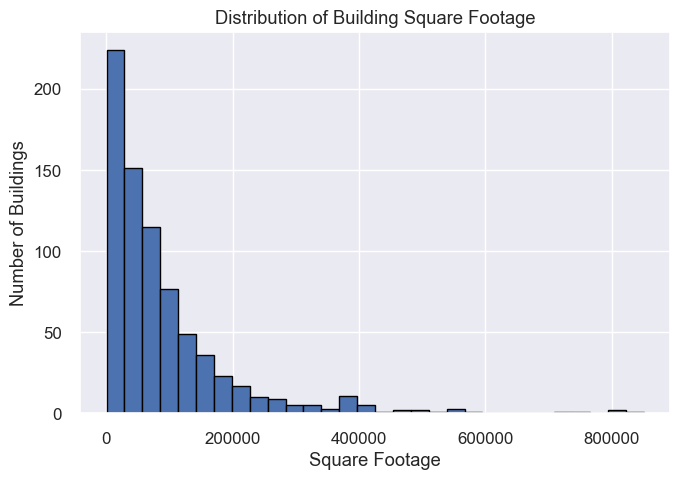

In [7]:


plt.figure(figsize=(7,5))
plt.hist(building_level['building_age'], bins=30, edgecolor='black')
plt.title("Distribution of Building Ages")
plt.xlabel("Building Age (years)")
plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.hist(building_level['mean_electricity'], bins=30, edgecolor='black')
plt.title("Distribution of Mean Electricity Use per Building")
plt.xlabel("Mean Electricity Use")
plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.hist(building_level['sqft'], bins=30, edgecolor='black')
plt.title("Distribution of Building Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()



### Deeper relationship plots

**i. Age vs electricity**

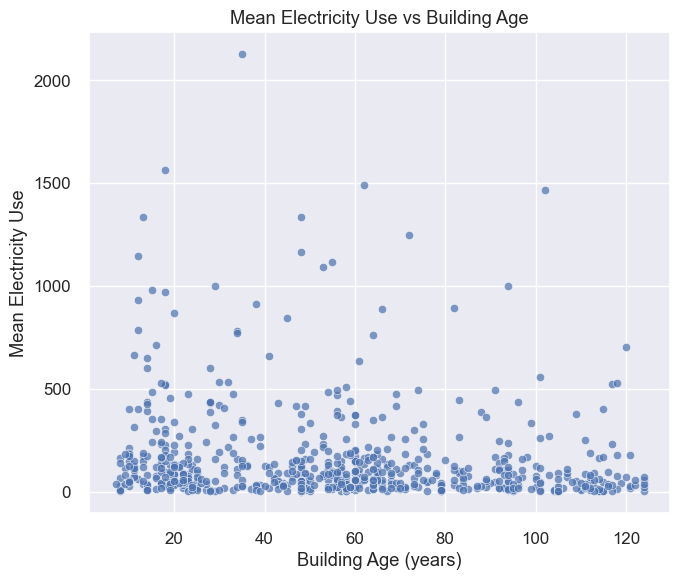

In [9]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=building_level,
    x='building_age',
    y='mean_electricity',
    alpha=0.7
)
plt.title("Mean Electricity Use vs Building Age")
plt.xlabel("Building Age (years)")
plt.ylabel("Mean Electricity Use")
plt.tight_layout()
plt.show()


This scatter plot displays the relationship between a building’s age and its average electricity use. The points are widely dispersed with no strong linear trend, indicating that building age alone does not reliably predict electricity consumption. While a few older buildings show higher electricity usage, many older buildings fall in the same low-use range as newer ones. There is no clear correlation between building age and electricity usage. Electricity consumption varies substantially across buildings of all ages.This suggests that other factors play a more significant role than age alone such as building size, type, occupancy, HVAC systems or renovations history. This aligns with the expectations, such as some older buildings might have undergone energy efficient retrofits , while some newer buildings may have higher energy loads depending on their uses. In conclusion age alone is not a strong driver of electricity usage and more features should be included in subsequent models.

**ii. Size vs mean electricity**

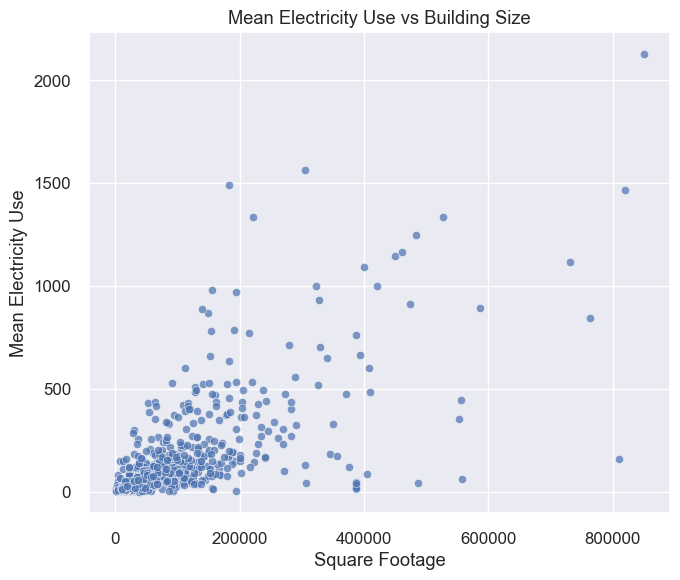

In [11]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=building_level,
    x='sqft',
    y='mean_electricity',
    alpha=0.7
)
plt.title("Mean Electricity Use vs Building Size")
plt.xlabel("Square Footage")
plt.ylabel("Mean Electricity Use")
plt.tight_layout()
plt.show()


This figure compares examines how square footage relates to mean electricty use. There is a clearer upward trend compared to the age plot, larger buildings tend to use more electrocty especially those above 100,000 sq ft. Although the relationship is noisy, the general pattern suggests that the size is a meaningful predictor of consumption. Electricty use increases with building size, which is expected because larger structures require more heating, cooling, lighting and equipment. This relationship is positive but non linear, small building s cluster tightly near lower electricty values, while larger buildings show much wider variability. The plot shows some existing outliers, such as buildings with very large square footage with relatively low electricity consumption may represent warehouses or low occupancy spaces, while small but high usage buildings may be labs or specialized facilities. In conclusion square footage appears to be much stronger predictor of electricty usage than age, and should be included in the modeling stage. 

***iii. Boxplot by building type***

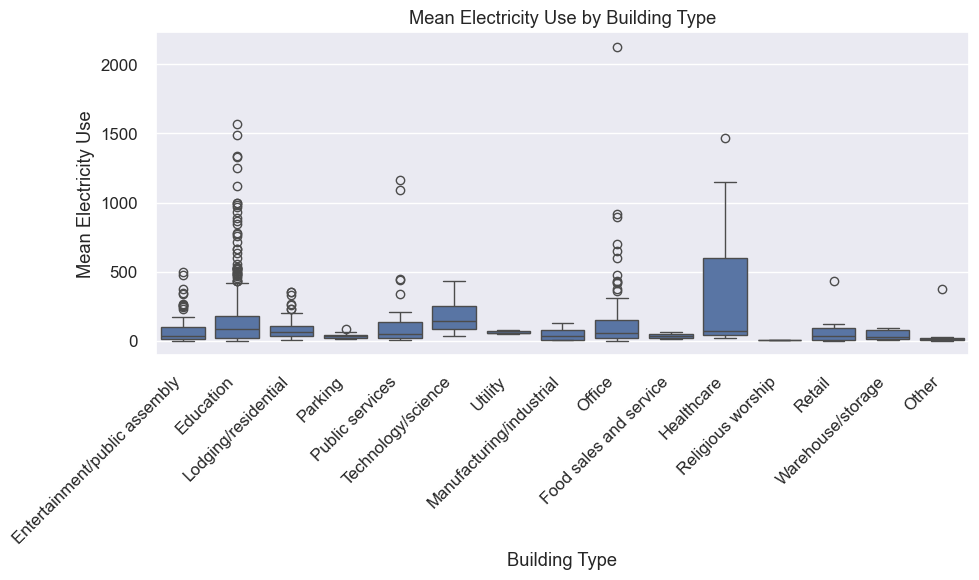

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=building_level,
    x='primaryspaceusage',
    y='mean_electricity'
)
plt.xticks(rotation=45, ha='right')
plt.title("Mean Electricity Use by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Mean Electricity Use")
plt.tight_layout()
plt.show()


This boxplot compares electricity use across different building types. The distributions vary widely, indicating that building function strongly influences energy consumption. Some types, such as healthcare, technology/science, and office buildings show higher usage and greater variability, while others like retail or warehouse/storage show lower, tighter distributions. 

Building type is a major determinant of electricty usage. Categories such as education, healthcare, office, and labs have higher typical electricity use because they contain lighting, ventilation, IT infrastructure, lab equipment or medical equipment. Categories like retail, warehouse/storage and parking have lower usage becayse they have fewer active sytems and lower occupant loads. The large number of rof outliers in several categories substantial variation within each type, likely due to building size differences and operational schedules.

In conclusion, building type captures important operational and functional differences and will be a key feature in the multiple regression model. It likely explains far more variance than age alone.

### Feature engineering

**Generating new variables**

In [15]:
# Energy intensity: kWh per square foot
building_level['energy_intensity'] = (
    building_level['mean_electricity'] / building_level['sqft']
)

# Log-transform to handle skew
building_level['log_mean_electricity'] = np.log1p(building_level['mean_electricity'])

# Optional: age bins
building_level['age_bin'] = pd.cut(
    building_level['building_age'],
    bins=[0, 25, 50, 75, 150],
    labels=["0–25", "26–50", "51–75", "75+"]
)


**Histogram of energy intensity**

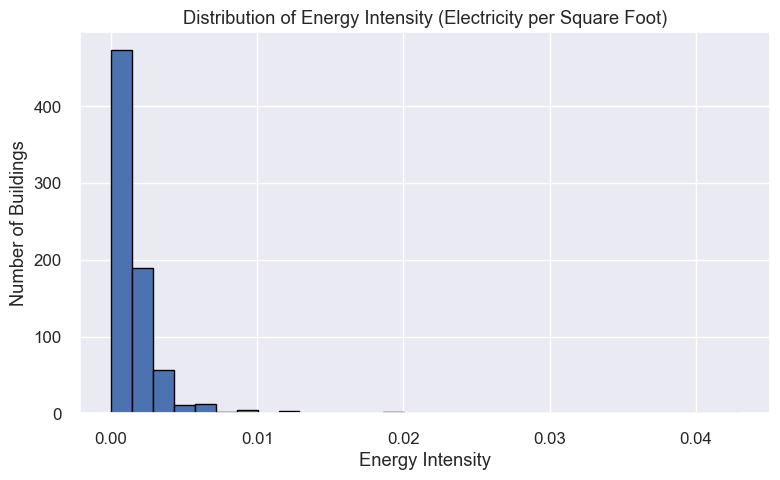

In [17]:
plt.figure(figsize=(8,5))
plt.hist(building_level['energy_intensity'], bins=30, edgecolor='black')
plt.title("Distribution of Energy Intensity (Electricity per Square Foot)")
plt.xlabel("Energy Intensity")
plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()


Energy intensity varies widely across buildings, with most buildings clustered at lower values and a long tail of high-intensity buildings. High energy intensity outliers may represent specialized buildings such as labs, healthcare facilities, or older buildings with inefficient systems. This engineered feature helps normalize electricity use by building size and allows more meaningful comparisons.

**Energy Intesnity vs building Age**

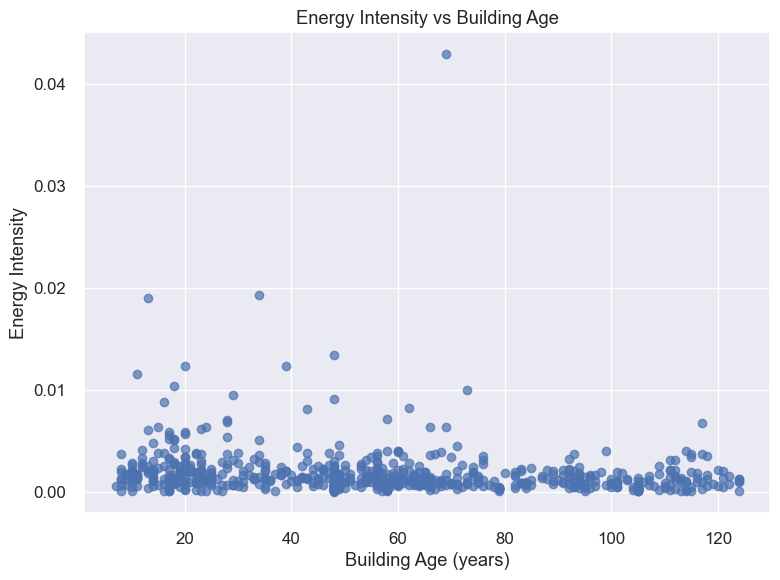

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(building_level['building_age'], building_level['energy_intensity'], alpha=0.7)
plt.title("Energy Intensity vs Building Age")
plt.xlabel("Building Age (years)")
plt.ylabel("Energy Intensity")
plt.tight_layout()
plt.show()


This plot explores whether older buildings use electricity less efficiently (higher electricity per square foot). The scatter is wide, but some older buildings show elevated energy intensity, suggesting age may interact with other characteristics such as type or renovation history.

### Better regression models

We can now do multiple linear regression with the pther features related to electrocty consumption, such as age square feet and type. A tree based model using RandomForestRegressor as a stronger non linear model would also be a good model for this type of dataset.$

**i. One-hot encode building type**

In [21]:
model_df = building_level.dropna(subset=['mean_electricity', 'building_age', 'sqft', 'primaryspaceusage'])

X = model_df[['building_age', 'sqft', 'primaryspaceusage']]
y = model_df['mean_electricity']

X = pd.get_dummies(X, columns=['primaryspaceusage'], drop_first=True)


**ii. Train/test split + model**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Multiple Linear Regression Results:
MAE : 82.69690347885286
RMSE: 158.04924586647817
R²  : 0.1814686051522827


**Comparing results with baseline model**

The multiple linear regression model shows clear improvements over the baseline age-only model from Notebook 1. In the baseline model, building age alone explained only a very small portion of the variance in electricity usage, as indicated by a very low R² score. By adding building size (square footage) and building type as predictors, the multiple regression model increases the R² to approximately 0.18, meaning it now explains about 18% of the variation in mean electricity consumption.

Error metrics also improve. The multiple regression model achieves an MAE of 82.7 and an RMSE of 158.0, both lower than the baseline model’s error values, showing that the new model makes more accurate predictions on average. This improvement is expected since electricity use varies strongly with building size and function, and these factors were not included in the baseline model.

Overall, the comparison demonstrates that incorporating building size and type provides meaningful predictive value beyond age alone. While the model still leaves a large amount of variance unexplained likely due to additional drivers such as occupancy patterns, equipment loads, and HVAC systems, it represents a clear improvement over the baseline and forms a solid foundation for more advanced models in later notebooks.

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Results:
MAE : 79.73783171208522
RMSE: 163.08050797033675
R²  : 0.12852567492434075


**Comparing Random Forest with multiple Linear regression**

The Random Forest model produces mixed results. It achieves a slightly lower MAE  of 79.7 compared to the multiple linear regression model with 82.7, indicating that on average its predictions are a little closer to the true values. However, its RMSE of 163.1 is slightly higher, and its R² score of 0.129 is lower than the linear model’s R² of 0.181. This suggests that while Random Forest reduces some individual prediction errors, it does not explain the variance in electricity usage as well as the linear model.

This is expected because Random Forests typically shine when there are strong non-linear relationships and many predictive features. In this dataset, only a few building attributes are available (age, size, type), so the linear model already captures most of the structured signal. Random Forest cannot leverage additional interactions without additional features such as occupancy levels, HVAC load, or building operational schedules.


## Conclusion

In this notebook, I conducted a deeper exploratory analysis of the cleaned building electricity dataset and examined how electricity use varies with several key building characteristics. The visualizations showed that building age alone does not strongly influence electricity consumption, while building size (square footage) and building type exhibit clearer relationships. Larger buildings and certain categories such as healthcare, science, and office spaces tend to consume more electricity, highlighting the importance of building function and scale.

I also engineered new features, including energy intensity (electricity per square foot) and log transformed electricity usage, which provided additional insight into efficiency differences across building groups. These engineered features will be useful for improving model performance in later analyses.

To build on the baseline model from Notebook 1, I fit both a multiple linear regression model and a Random Forest model. The multiple linear regression improved predictive accuracy over the baseline by incorporating building size and type, explaining roughly 18% of the variance in electricity use. The Random Forest model produced slightly lower MAE but a lower R², suggesting limited non-linear structure in the available features. Together, these results indicate that electricity usage is influenced by multiple building level attributes, but additional predictors, such as occupancy, HVAC systems, or operational schedules would be required for substantially higher predictive performance.

Overall, this notebook establishes a solid understanding of the main drivers of electricity usage and creates a modeling ready dataset for further analysis. The next notebook will focus on model interpretation, feature importance, and understanding which building characteristics matter most for electricity prediction.


**Export model ready dataset**

In [28]:
# Make sure building_level exists and has what we need
building_level = (
    merged_df
    .groupby('building_id', as_index=False)
    .agg({
        'electricity': 'mean',
        'building_age': 'first',
        'sqft': 'first',
        'primaryspaceusage': 'first'
    })
    .rename(columns={'electricity': 'mean_electricity'})
)

building_level['energy_intensity'] = (
    building_level['mean_electricity'] / building_level['sqft']
)

# Export a light, modeling-ready file
building_level.to_csv("../data/processed/building_level_model_df.csv", index=False)
print(building_level.shape)


(755, 6)


In [30]:
model_df.to_csv("../data/processed/building_level_model_df.csv", index=False)
